In [22]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import webcolors

In [23]:
data_root_dir = '../input/data'

left_csv = '/opt/ml/segmentation/mmsegmentation/work_dirs/fcn_hr48_512x512_80k_ade20/submission_iter_12000_real_test.csv'
right_csv = '/opt/ml/segmentation/mmsegmentation/work_dirs/fcn_hr48_512x512_80k_ade20/submission_iter_36000_test_JH.csv'

start_sample_num = 2
num_examples = 20

In [24]:
left_df = pd.read_csv(left_csv)
left_pred_strs = left_df["PredictionString"]
left_image_ids = left_df['image_id']
left_pred_array_list = []
for pred_str in left_pred_strs:
    flatten_pred_ints = [int(pred) for pred in pred_str.split(' ')]
    pred_array = np.asarray(flatten_pred_ints, dtype=np.uint8).reshape(256, 256)
    left_pred_array_list.append(pred_array)

In [25]:
right_df = pd.read_csv(right_csv)
right_pred_strs = right_df["PredictionString"]
right_image_ids = right_df['image_id']
right_pred_array_list = []
for pred_str in right_pred_strs:
    flatten_pred_ints = [int(pred) for pred in pred_str.split(' ')]
    pred_array = np.asarray(flatten_pred_ints, dtype=np.uint8).reshape(256, 256)
    right_pred_array_list.append(pred_array)

In [26]:
class_colormap = pd.read_csv("/opt/ml/segmentation/baseline_code/class_dict.csv")
category_and_rgb = [[category, (r,g,b)] for idx, (category, r, g, b) in enumerate(class_colormap.values)]
legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), 
                         edgecolor=webcolors.rgb_to_hex(rgb), 
                         label=category) for category, rgb in category_and_rgb]

def create_trash_label_colormap():
    """Creates a label colormap used in Trash segmentation.
    Returns:
        A colormap for visualizing segmentation results.
    """
    colormap = np.zeros((11, 3), dtype=np.uint8)
    for inex, (_, r, g, b) in enumerate(class_colormap.values):
        colormap[inex] = [r, g, b]
    
    return colormap


def label_to_color_image(label):
    """Adds color defined by the dataset colormap to the label.

    Args:
        label: A 2D array with integer type, storing the segmentation label.

    Returns:
        result: A 2D array with floating type. The element of the array
                is the color indexed by the corresponding element in the input label
                to the trash color map.

    Raises:
        ValueError: If label is not of rank 2 or its value is larger than color
              map maximum entry.
    """
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_trash_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]

TypeError: Image data of dtype object cannot be converted to float

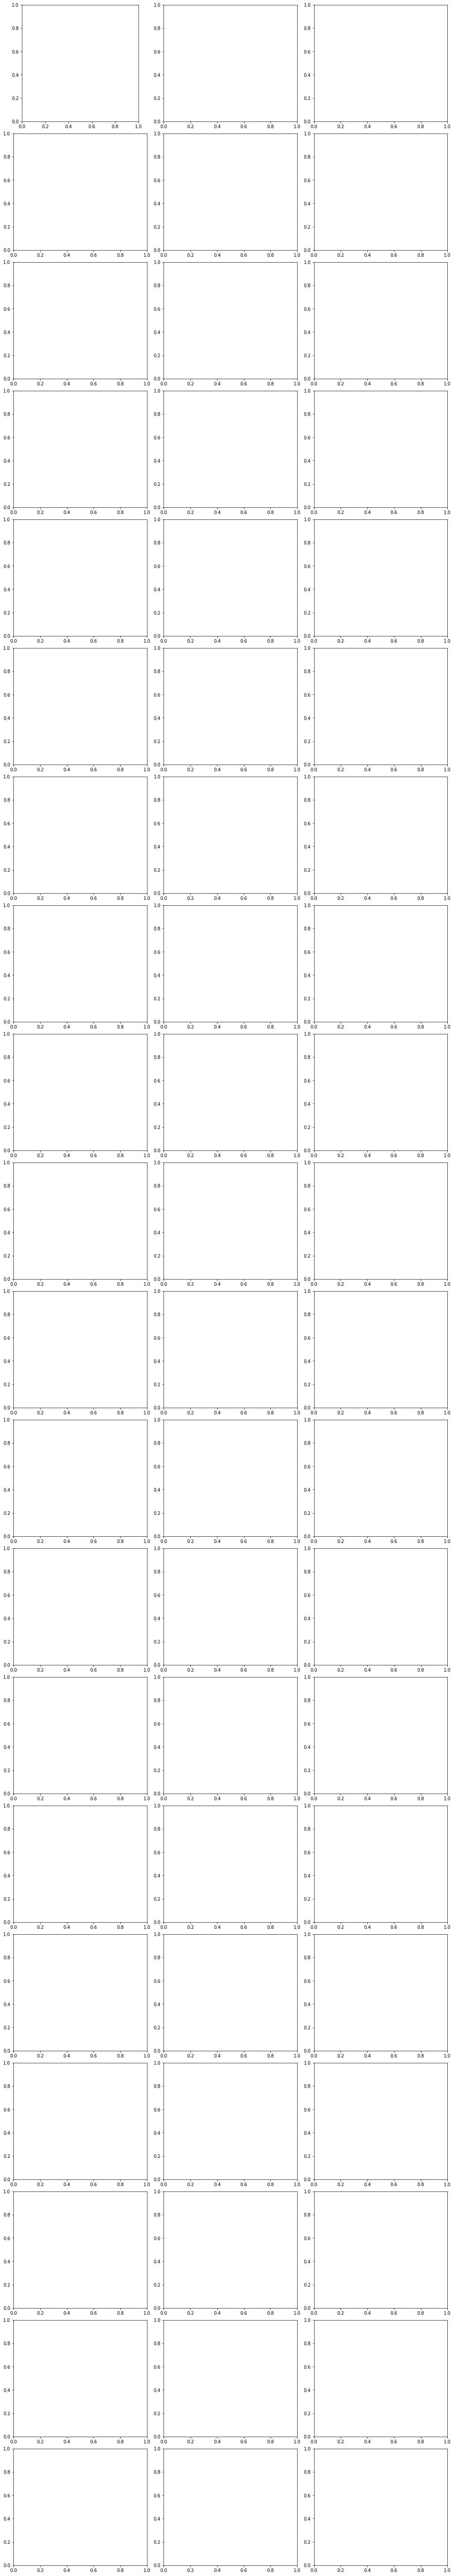

In [27]:
fig, ax = plt.subplots(nrows=num_examples, ncols=3, figsize=(14, 4*num_examples), constrained_layout=True)

for row_num, sample_num in enumerate(range(start_sample_num, start_sample_num+num_examples)):
    # org
    ax[row_num][0].imshow(cv2.imread(data_root_dir + '/' + left_image_ids[sample_num]))
    ax[row_num][0].set_title(f"{left_image_ids[sample_num]}")
    # left
    ax[row_num][1].imshow(label_to_color_image(left_pred_array_list[sample_num]))
    ax[row_num][1].set_title(f"{left_image_ids[sample_num]}")
    # right
    ax[row_num][2].imshow(label_to_color_image(right_pred_array_list[sample_num]))
    ax[row_num][2].set_title(f"{right_image_ids[sample_num]}")
    ax[row_num][2].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.show()